In [1]:
import pandas as pd

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl

from tensorflow.keras import optimizers # lr 조정할때 쓰임
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd


In [3]:
df = pd.read_excel('데이터관련/sungnamprice2.xlsx')
df

,시군구,동별인구,번지,본번,부번,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도,도로명,위도,경도,역명,역과의거리(km),공원명,공원과의거리(km)
0,경기도 성남분당구 구미동,31307,77,77,0,까치마을(1단지)(대우롯데선경),70.6600,202007,84800,1,1995,미금로 184,37.350043,127.117021,미금,0.716984,정자공원,0.504077
1,경기도 성남분당구 구미동,31307,77,77,0,까치마을(1단지)(대우롯데선경),70.6600,202007,89900,7,1995,미금로 184,37.350043,127.117021,미금,0.716984,정자공원,0.504077
2,경기도 성남분당구 구미동,31307,77,77,0,까치마을(1단지)(대우롯데선경),84.7900,202007,108000,4,1995,미금로 184,37.350043,127.117021,미금,0.716984,정자공원,0.504077
3,경기도 성남분당구 구미동,31307,77,77,0,까치마을(1단지)(대우롯데선경),70.6600,202007,90000,7,1995,미금로 184,37.350043,127.117021,미금,0.716984,정자공원,0.504077
4,경기도 성남분당구 구미동,31307,77,77,0,까치마을(1단지)(대우롯데선경),84.7900,202007,98800,4,1995,미금로 184,37.350043,127.117021,미금,0.716984,정자공원,0.504077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,경기도 성남분당구 판교동,23740,585,585,0,판교원마을9단지(한림풀에버),84.9958,202104,157000,18,2009,서판교로 29,37.390090,127.096409,판교,1.407545,판교제4호(판교)공원,0.529079
1302,경기도 성남분당구 판교동,23740,585,585,0,판교원마을9단지(한림풀에버),84.9562,202104,146000,3,2009,서판교로 29,37.390090,127.096409,판교,1.407545,판교제4호(판교)공원,0.529079
1303,경기도 성남분당구 판교동,23740,585,585,0,판교원마을9단지(한림풀에버),84.9562,202105,149000,14,2009,서판교로 29,37.390090,127.096409,판교,1.407545,판교제4호(판교)공원,0.529079
1304,경기도 성남분당구 판교동,23740,585,585,0,판교원마을9단지(한림풀에버),84.9907,202105,158000,11,2009,서판교로 29,37.390090,127.096409,판교,1.407545,판교제4호(판교)공원,0.529079


In [5]:
x = df[['동별인구', '전용면적(㎡)', '층', '건축년도','역과의거리(km)','공원과의거리(km)']]
y = df["거래금액(만원)"]
x

,동별인구,전용면적(㎡),층,건축년도,역과의거리(km),공원과의거리(km)
0,31307,70.6600,1,1995,0.716984,0.504077
1,31307,70.6600,7,1995,0.716984,0.504077
2,31307,84.7900,4,1995,0.716984,0.504077
3,31307,70.6600,7,1995,0.716984,0.504077
4,31307,84.7900,4,1995,0.716984,0.504077
...,...,...,...,...,...,...
1301,23740,84.9958,18,2009,1.407545,0.529079
1302,23740,84.9562,3,2009,1.407545,0.529079
1303,23740,84.9562,14,2009,1.407545,0.529079
1304,23740,84.9907,11,2009,1.407545,0.529079


Epoch 1/1000
21/21 [==============================] - 0s 4ms/step - loss: 12384014336.0000 - val_loss: 10767040512.0000
Epoch 2/1000
21/21 [==============================] - 0s 1ms/step - loss: 8437701120.0000 - val_loss: 6194349568.0000
Epoch 3/1000
21/21 [==============================] - 0s 1ms/step - loss: 4120429568.0000 - val_loss: 2932382464.0000
Epoch 4/1000
21/21 [==============================] - 0s 1ms/step - loss: 2648589824.0000 - val_loss: 2868209152.0000
Epoch 5/1000
21/21 [==============================] - 0s 1ms/step - loss: 2654801664.0000 - val_loss: 2806393088.0000
Epoch 6/1000
21/21 [==============================] - 0s 997us/step - loss: 2645914624.0000 - val_loss: 2792152576.0000
Epoch 7/1000
21/21 [==============================] - 0s 1ms/step - loss: 2617088768.0000 - val_loss: 2777803520.0000
Epoch 8/1000
21/21 [==============================] - 0s 1ms/step - loss: 2607904768.0000 - val_loss: 2763136512.0000
Epoch 9/1000
21/21 [==============================] 

21/21 [==============================] - 0s 1ms/step - loss: 524508448.0000 - val_loss: 565889856.0000
Epoch 71/1000
21/21 [==============================] - 0s 1ms/step - loss: 520472448.0000 - val_loss: 571716672.0000
Epoch 72/1000
21/21 [==============================] - 0s 1ms/step - loss: 522237920.0000 - val_loss: 587653376.0000
Epoch 73/1000
21/21 [==============================] - 0s 1ms/step - loss: 518150208.0000 - val_loss: 564024448.0000
Epoch 74/1000
21/21 [==============================] - 0s 1ms/step - loss: 510916416.0000 - val_loss: 566206272.0000
Epoch 75/1000
21/21 [==============================] - 0s 1ms/step - loss: 511837664.0000 - val_loss: 582712320.0000
Epoch 76/1000
21/21 [==============================] - 0s 997us/step - loss: 519661440.0000 - val_loss: 599891776.0000
Epoch 77/1000
21/21 [==============================] - 0s 997us/step - loss: 531660544.0000 - val_loss: 569686912.0000
Epoch 78/1000
21/21 [==============================] - 0s 1ms/step - loss:

Epoch 140/1000
21/21 [==============================] - 0s 1ms/step - loss: 525517504.0000 - val_loss: 568761216.0000
Epoch 141/1000
21/21 [==============================] - 0s 2ms/step - loss: 518784736.0000 - val_loss: 564531456.0000
Epoch 142/1000
21/21 [==============================] - 0s 1ms/step - loss: 518685312.0000 - val_loss: 563290880.0000
Epoch 143/1000
21/21 [==============================] - 0s 2ms/step - loss: 519050528.0000 - val_loss: 586776512.0000
Epoch 144/1000
21/21 [==============================] - 0s 2ms/step - loss: 513126912.0000 - val_loss: 562387136.0000
Epoch 145/1000
21/21 [==============================] - 0s 2ms/step - loss: 512426624.0000 - val_loss: 562203648.0000
Epoch 146/1000
21/21 [==============================] - 0s 1ms/step - loss: 517196896.0000 - val_loss: 561868992.0000
Epoch 147/1000
21/21 [==============================] - 0s 1ms/step - loss: 509773376.0000 - val_loss: 568635968.0000
Epoch 148/1000
21/21 [==============================] - 

21/21 [==============================] - 0s 1ms/step - loss: 512372480.0000 - val_loss: 562908416.0000
Epoch 210/1000
21/21 [==============================] - 0s 1ms/step - loss: 517096608.0000 - val_loss: 561510400.0000
Epoch 211/1000
21/21 [==============================] - 0s 1ms/step - loss: 515408576.0000 - val_loss: 592817600.0000
Epoch 212/1000
21/21 [==============================] - 0s 2ms/step - loss: 528743008.0000 - val_loss: 566691776.0000
Epoch 213/1000
21/21 [==============================] - 0s 2ms/step - loss: 513611456.0000 - val_loss: 560172544.0000
Epoch 214/1000
21/21 [==============================] - 0s 1ms/step - loss: 513431200.0000 - val_loss: 560847232.0000
Epoch 215/1000
21/21 [==============================] - 0s 1ms/step - loss: 512530496.0000 - val_loss: 565802176.0000
Epoch 216/1000
21/21 [==============================] - 0s 2ms/step - loss: 520824288.0000 - val_loss: 620977728.0000
Epoch 217/1000
21/21 [==============================] - 0s 2ms/step - l

21/21 [==============================] - 0s 1ms/step - loss: 507650848.0000 - val_loss: 561920640.0000
Epoch 279/1000
21/21 [==============================] - 0s 1ms/step - loss: 509766688.0000 - val_loss: 591196864.0000
Epoch 280/1000
21/21 [==============================] - 0s 1ms/step - loss: 537000576.0000 - val_loss: 563112896.0000
Epoch 281/1000
21/21 [==============================] - 0s 997us/step - loss: 522571424.0000 - val_loss: 577066688.0000
Epoch 282/1000
21/21 [==============================] - 0s 1ms/step - loss: 512276448.0000 - val_loss: 581659776.0000
Epoch 283/1000
21/21 [==============================] - 0s 1ms/step - loss: 528084704.0000 - val_loss: 559554304.0000
Epoch 284/1000
21/21 [==============================] - 0s 1ms/step - loss: 520441760.0000 - val_loss: 584856640.0000
Epoch 285/1000
21/21 [==============================] - 0s 997us/step - loss: 515244512.0000 - val_loss: 559196032.0000
Epoch 286/1000
21/21 [==============================] - 0s 1ms/step

21/21 [==============================] - 0s 1ms/step - loss: 513951904.0000 - val_loss: 558313600.0000
Epoch 348/1000
21/21 [==============================] - 0s 1ms/step - loss: 510091840.0000 - val_loss: 577579968.0000
Epoch 349/1000
21/21 [==============================] - 0s 1ms/step - loss: 524193824.0000 - val_loss: 591766720.0000
Epoch 350/1000
21/21 [==============================] - 0s 1ms/step - loss: 528519296.0000 - val_loss: 565715904.0000
Epoch 351/1000
21/21 [==============================] - 0s 1ms/step - loss: 506311104.0000 - val_loss: 557426944.0000
Epoch 352/1000
21/21 [==============================] - 0s 1ms/step - loss: 520932320.0000 - val_loss: 620712896.0000
Epoch 353/1000
21/21 [==============================] - 0s 1ms/step - loss: 517815776.0000 - val_loss: 571901184.0000
Epoch 354/1000
21/21 [==============================] - 0s 1ms/step - loss: 511198400.0000 - val_loss: 573313664.0000
Epoch 355/1000
21/21 [==============================] - 0s 1ms/step - l

21/21 [==============================] - 0s 1ms/step - loss: 517249888.0000 - val_loss: 578477120.0000
Epoch 417/1000
21/21 [==============================] - 0s 1ms/step - loss: 521033472.0000 - val_loss: 557487104.0000
Epoch 418/1000
21/21 [==============================] - 0s 997us/step - loss: 510976576.0000 - val_loss: 557146240.0000
Epoch 419/1000
21/21 [==============================] - 0s 997us/step - loss: 514078720.0000 - val_loss: 561808640.0000
Epoch 420/1000
21/21 [==============================] - 0s 1ms/step - loss: 508158368.0000 - val_loss: 556654656.0000
Epoch 421/1000
21/21 [==============================] - 0s 1ms/step - loss: 507702304.0000 - val_loss: 578886208.0000
Epoch 422/1000
21/21 [==============================] - 0s 1ms/step - loss: 516120000.0000 - val_loss: 564374976.0000
Epoch 423/1000
21/21 [==============================] - 0s 1ms/step - loss: 506234720.0000 - val_loss: 556621376.0000
Epoch 424/1000
21/21 [==============================] - 0s 997us/st

Epoch 485/1000
21/21 [==============================] - 0s 1ms/step - loss: 512891712.0000 - val_loss: 586250496.0000
Epoch 486/1000
21/21 [==============================] - 0s 1ms/step - loss: 503665472.0000 - val_loss: 554443648.0000
Epoch 487/1000
21/21 [==============================] - 0s 997us/step - loss: 510046400.0000 - val_loss: 557744576.0000
Epoch 488/1000
21/21 [==============================] - 0s 997us/step - loss: 511094432.0000 - val_loss: 555648960.0000
Epoch 489/1000
21/21 [==============================] - 0s 997us/step - loss: 515047360.0000 - val_loss: 563633344.0000
Epoch 490/1000
21/21 [==============================] - 0s 1ms/step - loss: 515614720.0000 - val_loss: 595508096.0000
Epoch 491/1000
21/21 [==============================] - 0s 997us/step - loss: 525674208.0000 - val_loss: 562240256.0000
Epoch 492/1000
21/21 [==============================] - 0s 997us/step - loss: 513100256.0000 - val_loss: 555049344.0000
Epoch 493/1000
21/21 [========================

21/21 [==============================] - 0s 1ms/step - loss: 505918656.0000 - val_loss: 560303040.0000
Epoch 554/1000
21/21 [==============================] - 0s 1ms/step - loss: 521367808.0000 - val_loss: 588034816.0000
Epoch 555/1000
21/21 [==============================] - 0s 1ms/step - loss: 506831168.0000 - val_loss: 574168256.0000
Epoch 556/1000
21/21 [==============================] - 0s 1ms/step - loss: 506486944.0000 - val_loss: 554652864.0000
Epoch 557/1000
21/21 [==============================] - 0s 1ms/step - loss: 503423232.0000 - val_loss: 583407552.0000
Epoch 558/1000
21/21 [==============================] - 0s 1ms/step - loss: 515151712.0000 - val_loss: 603717376.0000
Epoch 559/1000
21/21 [==============================] - 0s 1ms/step - loss: 500847968.0000 - val_loss: 554909952.0000
Epoch 560/1000
21/21 [==============================] - 0s 2ms/step - loss: 504405536.0000 - val_loss: 552089344.0000
Epoch 561/1000
21/21 [==============================] - 0s 1ms/step - l

21/21 [==============================] - 0s 1ms/step - loss: 503688320.0000 - val_loss: 555179456.0000
Epoch 623/1000
21/21 [==============================] - 0s 1ms/step - loss: 507220416.0000 - val_loss: 551969792.0000
Epoch 624/1000
21/21 [==============================] - 0s 1ms/step - loss: 503056640.0000 - val_loss: 548467392.0000
Epoch 625/1000
21/21 [==============================] - 0s 1ms/step - loss: 509467168.0000 - val_loss: 552819840.0000
Epoch 626/1000
21/21 [==============================] - 0s 1ms/step - loss: 502234112.0000 - val_loss: 555010624.0000
Epoch 627/1000
21/21 [==============================] - 0s 1ms/step - loss: 506386752.0000 - val_loss: 552917248.0000
Epoch 628/1000
21/21 [==============================] - 0s 1ms/step - loss: 501486816.0000 - val_loss: 546675008.0000
Epoch 629/1000
21/21 [==============================] - 0s 1ms/step - loss: 505711904.0000 - val_loss: 548758848.0000
Epoch 630/1000
21/21 [==============================] - 0s 1ms/step - l

21/21 [==============================] - 0s 1ms/step - loss: 484389376.0000 - val_loss: 532271008.0000
Epoch 692/1000
21/21 [==============================] - 0s 997us/step - loss: 481570912.0000 - val_loss: 529206784.0000
Epoch 693/1000
21/21 [==============================] - 0s 1ms/step - loss: 484925664.0000 - val_loss: 541577216.0000
Epoch 694/1000
21/21 [==============================] - 0s 997us/step - loss: 480484640.0000 - val_loss: 540862080.0000
Epoch 695/1000
21/21 [==============================] - 0s 1ms/step - loss: 485599104.0000 - val_loss: 557670720.0000
Epoch 696/1000
21/21 [==============================] - 0s 997us/step - loss: 478798400.0000 - val_loss: 526761888.0000
Epoch 697/1000
21/21 [==============================] - 0s 1ms/step - loss: 489039584.0000 - val_loss: 540163200.0000
Epoch 698/1000
21/21 [==============================] - 0s 997us/step - loss: 479417472.0000 - val_loss: 535034496.0000
Epoch 699/1000
21/21 [==============================] - 0s 950u

21/21 [==============================] - 0s 997us/step - loss: 446324000.0000 - val_loss: 502303328.0000
Epoch 761/1000
21/21 [==============================] - 0s 997us/step - loss: 456346880.0000 - val_loss: 495036960.0000
Epoch 762/1000
21/21 [==============================] - 0s 1ms/step - loss: 443709824.0000 - val_loss: 494523904.0000
Epoch 763/1000
21/21 [==============================] - 0s 997us/step - loss: 447612160.0000 - val_loss: 548144000.0000
Epoch 764/1000
21/21 [==============================] - 0s 997us/step - loss: 477826784.0000 - val_loss: 494593568.0000
Epoch 765/1000
21/21 [==============================] - 0s 1ms/step - loss: 460741152.0000 - val_loss: 498728736.0000
Epoch 766/1000
21/21 [==============================] - 0s 1ms/step - loss: 442716416.0000 - val_loss: 497454848.0000
Epoch 767/1000
21/21 [==============================] - 0s 1ms/step - loss: 442431936.0000 - val_loss: 511656800.0000
Epoch 768/1000
21/21 [==============================] - 0s 1ms/

21/21 [==============================] - 0s 1ms/step - loss: 450026880.0000 - val_loss: 491791648.0000
Epoch 830/1000
21/21 [==============================] - 0s 1ms/step - loss: 450285440.0000 - val_loss: 511994144.0000
Epoch 831/1000
21/21 [==============================] - 0s 1ms/step - loss: 448162336.0000 - val_loss: 490241952.0000
Epoch 832/1000
21/21 [==============================] - 0s 1ms/step - loss: 436122208.0000 - val_loss: 488977376.0000
Epoch 833/1000
21/21 [==============================] - 0s 1ms/step - loss: 434143296.0000 - val_loss: 480699936.0000
Epoch 834/1000
21/21 [==============================] - 0s 1ms/step - loss: 436990336.0000 - val_loss: 480596160.0000
Epoch 835/1000
21/21 [==============================] - 0s 1ms/step - loss: 435701344.0000 - val_loss: 480979328.0000
Epoch 836/1000
21/21 [==============================] - 0s 1ms/step - loss: 434288128.0000 - val_loss: 489331104.0000
Epoch 837/1000
21/21 [==============================] - 0s 997us/step -

21/21 [==============================] - 0s 1ms/step - loss: 437213376.0000 - val_loss: 531243328.0000
Epoch 899/1000
21/21 [==============================] - 0s 1ms/step - loss: 435519776.0000 - val_loss: 506166112.0000
Epoch 900/1000
21/21 [==============================] - 0s 1ms/step - loss: 437704384.0000 - val_loss: 517201696.0000
Epoch 901/1000
21/21 [==============================] - 0s 1ms/step - loss: 444263904.0000 - val_loss: 477359872.0000
Epoch 902/1000
21/21 [==============================] - 0s 1ms/step - loss: 428658400.0000 - val_loss: 475065088.0000
Epoch 903/1000
21/21 [==============================] - 0s 1ms/step - loss: 436376896.0000 - val_loss: 514178272.0000
Epoch 904/1000
21/21 [==============================] - 0s 1ms/step - loss: 454630016.0000 - val_loss: 484609088.0000
Epoch 905/1000
21/21 [==============================] - 0s 1ms/step - loss: 440153088.0000 - val_loss: 476008160.0000
Epoch 906/1000
21/21 [==============================] - 0s 1ms/step - l

Epoch 967/1000
21/21 [==============================] - 0s 997us/step - loss: 432263168.0000 - val_loss: 495168384.0000
Epoch 968/1000
21/21 [==============================] - 0s 997us/step - loss: 425841216.0000 - val_loss: 503323424.0000
Epoch 969/1000
21/21 [==============================] - 0s 950us/step - loss: 433050368.0000 - val_loss: 472730816.0000
Epoch 970/1000
21/21 [==============================] - 0s 1ms/step - loss: 423966528.0000 - val_loss: 473544416.0000
Epoch 971/1000
21/21 [==============================] - 0s 1ms/step - loss: 443384640.0000 - val_loss: 492907808.0000
Epoch 972/1000
21/21 [==============================] - 0s 1ms/step - loss: 432023936.0000 - val_loss: 474209440.0000
Epoch 973/1000
21/21 [==============================] - 0s 1ms/step - loss: 427267392.0000 - val_loss: 470894560.0000
Epoch 974/1000
21/21 [==============================] - 0s 1ms/step - loss: 425607040.0000 - val_loss: 487932928.0000
Epoch 975/1000
21/21 [============================

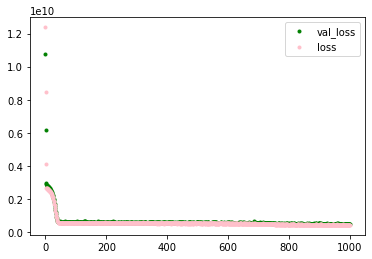

In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

model = Sequential()
model.add(Dense(100, input_dim=6, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=optimizers.Adam(lr=0.001))

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=50)

history = model.fit(x_train, y_train, validation_split=0.33, epochs=1000, batch_size=30, verbose=1,
                    callbacks=[early_stopping_callback])

hist = pd.DataFrame(history.history)

print(hist.tail())
y_loss = history.history['loss']
y_vloss = history.history['val_loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, "o", c="green", markersize=3, label='val_loss')
plt.plot(x_len, y_loss, "o", c="pink", markersize=3, label='loss')
plt.legend()
plt.show()


In [25]:
y_predict = model.predict(x_test).flatten()
avr = abs(y_predict - y_test).mean()

print('실제 최소 = %f, 실제 최대 = %f, 오차 평균 = %f'%(min(y_predict), max(y_predict),avr))

실제 최소 = 94104.085938, 실제 최대 = 148659.093750, 오차 평균 = 16731.310945
